# Projeto de Análise de Vendas. 
No presente projeto iremos analisar o desempenho de vendas de tres mercados localizados em tres cidades diferentes.<br>
O DataFrame possui as seguintes colunas:<br>
**Invoice ID**: numero de identificação da venda (gerada computacionalmente).<br>
**Branch**: ramo do supermercado (identificado por A,B ou C);<br>
**City**: cidade do supermercado;<br>
**Customer type**: tipo de cliente;<br>
**Gender**: sexo do clinte;<br>
**Product line**: categoria do produto;<br>
**Unit price**: preço unitário;<br>
**Quantity**: quantidade;<br>
**Tax 5%**: taxa de 5%;<br>
**Total**: total gasto; <br>
**Date**: data da compra; <br>
**Time**: horário da compra; <br>
**Payment**: forma de pagamento; <br>
**cogs**: custos de mercadorias vendidas. <br> 
**gross margin percentage**: percentual da margem bruta; <br>
**gross income**: rendimento bruto; <br>
**Rating**: nota pela experiencia da compra; <br> 

Agora vamos importar as bibliotecas necessárias para o tratamento dos dados e a base de dados de vendas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Vamos analisar algumas informações a respeito do tamanho desta base de dados utilizando o método **.info()** do pandas. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Vamos começar a análise exploratória dos dados verificando como está a distruibuição dos supermercados por cidade. 

In [5]:
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

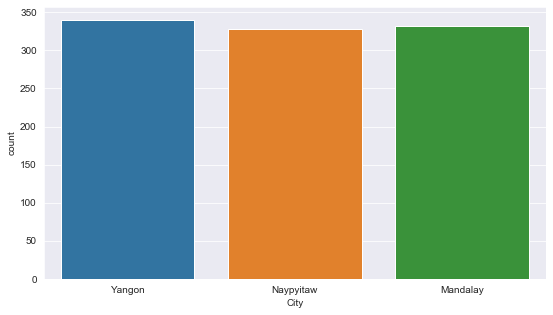

In [9]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
sns.countplot(x='City', data=df)

Agora vamos analisar o **"Customer type"**, para como está a divisão por estas tres cidades. 

In [14]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

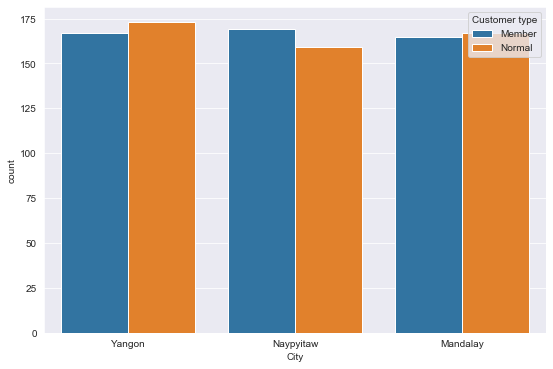

In [16]:
plt.figure(figsize=(9,6))
sns.countplot(x='City',hue='Customer type', data=df)

In [17]:
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

Nota se que a cidade que com o menor número de clientes, Naypyitaw, é a que possui o maior número de clientes membros. 

Ainda analisando o "Customer type", vamos pegar as medias de valores dos mesmos, utilizando o **groupby** do pandas. 

In [19]:
df.groupby('Customer type').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Customer type,,,,,,,,
Member,56.206986,5.558882,15.609110,327.791305,312.182196,4.761905,15.609110,6.940319
Normal,55.135130,5.460922,15.148707,318.122856,302.974148,4.761905,15.148707,7.005210


Analisando as médias, há diferenças significativas no **"Total¨** e no **"cogs"** dos clientes membros em comparação com os clientes normais. 

Ainda utilizando o método "groupby", vamos analisar o desempenho das tres cidades. 

In [22]:
df.groupby('City').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
City,,,,,,,,
Mandalay,55.659277,5.481928,15.232024,319.872506,304.640482,4.761905,15.232024,6.818072
Naypyitaw,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905,16.052367,7.072866
Yangon,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905,14.874001,7.027059


Visto que a cidade com o melhor desempenho médio é **"Naypyitaw"**, vamos analisar quais linhas de produtos estão tendo os melhores números. 

In [3]:
df[df['City']=='Naypyitaw'].groupby('Product line').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,
Electronic accessories,55.809455,6.054545,16.423355,344.890445,328.467091,4.761905,16.423355,6.747273
Fashion accessories,59.736000,5.261538,15.794923,331.693385,315.898462,4.761905,15.794923,7.440000
Food and beverages,57.273030,5.590909,17.147803,360.103864,342.956061,4.761905,17.147803,7.080303
Health and beauty,55.971346,5.326923,15.215500,319.525500,304.310000,4.761905,15.215500,6.998077
Home and lifestyle,54.334222,5.444444,14.704289,308.790067,294.085778,4.761905,14.704289,7.060000
Sports and travel,55.107333,5.888889,16.679289,350.265067,333.585778,4.761905,16.679289,7.028889


Analisando os números vemos que a área de **"Food and bevaranges"** está tendo o melhor desempenho. <br>
Na questão "Rating" a area com a melhor nota é a area de **"Fashion accessories"**;<br>
E a area com a pior nota é a area de **"Electronic accessories"**.

Vamos utilizar a mesma análise para as demais cidades. 

In [5]:
df[df['City']=='Yangon'].groupby('Product line').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,
Electronic accessories,54.871167,5.366667,14.537392,305.285225,290.747833,4.761905,14.537392,6.911667
Fashion accessories,56.670392,5.156863,15.249775,320.245265,304.995490,4.761905,15.249775,6.878431
Food and beverages,54.974483,5.396552,14.091216,295.915526,281.824310,4.761905,14.091216,7.253448
Health and beauty,49.862340,5.468085,12.763681,268.037298,255.273617,4.761905,12.763681,6.900000
Home and lifestyle,55.845692,5.707692,16.422854,344.879931,328.457077,4.761905,16.422854,6.930769
Sports and travel,55.610339,5.644068,15.635754,328.350839,312.715085,4.761905,15.635754,7.257627


Neste caso o setor com melhor desempenho é o **"Home and lifestyle"**.<br>
No quesito nota, a cidade de "Yangon" é a que apresenta as piores notas, dentre as tres cidades. 

In [6]:
df[df['City']=='Mandalay'].groupby('Product line').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,
Electronic accessories,49.854182,5.745455,14.763155,310.026245,295.263091,4.761905,14.763155,7.116364
Fashion accessories,54.843871,4.790323,12.606234,264.730911,252.124677,4.761905,12.606234,6.722581
Food and beverages,55.540000,5.400000,14.490370,304.297770,289.807400,4.761905,14.490370,6.994000
Health and beauty,58.185660,6.037736,17.952075,376.993585,359.041509,4.761905,17.952075,7.100000
Home and lifestyle,55.514000,5.900000,16.713490,350.983290,334.269800,4.761905,16.713490,6.516000
Sports and travel,59.678065,5.193548,15.351919,322.390306,307.038387,4.761905,15.351919,6.509677


Na cidade de "Mandalay", o setor com melhor desempenho é o setor de **"Health and beauty"**.<br>
No quesito nota, as piores notas estão nos setores de **"Sports and travel"**, e **"Home and lifestyle"**.  

Agora vamos ver como está a participação dos homens e mulheres. <br><br>
Vamos analisar como eles estão divididos entre as linhas de produtos.

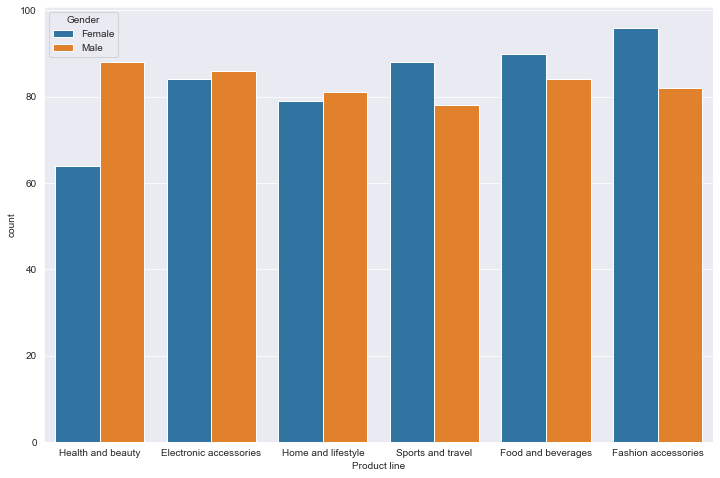

In [4]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.countplot(x='Product line', hue='Gender', data=df)

Nota se que há uma presença feminina nas linhas de "Sports and travel", "Food and beverages", "Fashion accessories", já mais homens comprarm produtos de linhas como "Health and beauty", "Electronic accessories", "Home and lifestyle"

Agora vamos analisar numericamente a relação **"Product line"** **"Gender"** 

In [7]:
#Homens.
df[df['Gender']=='Male'].groupby('Product line').mean() 

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,
Electronic accessories,55.016744,5.616279,15.080570,316.691965,301.611395,4.761905,15.080570,7.059302
Fashion accessories,59.058049,4.536585,13.860915,291.079207,277.218293,4.761905,13.860915,6.921951
Food and beverages,51.635833,5.214286,13.023768,273.499125,260.475357,4.761905,13.023768,7.016667
Health and beauty,57.592841,5.806818,16.576165,348.099460,331.523295,4.761905,16.576165,6.898864
Home and lifestyle,53.438889,5.098765,14.006488,294.136241,280.129753,4.761905,14.006488,6.909877
Sports and travel,59.955897,5.435897,16.207635,340.360327,324.152692,4.761905,16.207635,7.084615


In [6]:
#Mulheres. 
df[df['Gender']=='Female'].groupby('Product line').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,
Electronic accessories,52.051548,5.809524,15.363958,322.643125,307.279167,4.761905,15.363958,6.786905
Fashion accessories,55.526979,5.520833,15.097917,317.056250,301.958333,4.761905,15.097917,7.120833
Food and beverages,60.090333,5.711111,17.550750,368.565750,351.015000,4.761905,17.550750,7.203333
Health and beauty,51.089219,5.359375,13.810258,290.015414,276.205156,4.761905,13.810258,7.146875
Home and lifestyle,57.242532,6.303797,18.105411,380.213639,362.108228,4.761905,18.105411,6.763291
Sports and travel,54.367273,5.636364,15.462511,324.712739,309.250227,4.761905,15.462511,6.767045


# Analisando as datas e horários. 
No DataFrame há a coluna **"date"** e **"time"**. Para que possamos trabalhar e visualiza-los graficamente, é necessarário realizar o tratamento correto dos mesmos. <br><br>
Trabalhando com a coluna **"Date"**



In [13]:
df['Date'].head()

0     1/5/2019
1     3/8/2019
2     3/3/2019
3    1/27/2019
4     2/8/2019
Name: Date, dtype: object

Vamos aplicar uma função **lambda** e uma quebra **(.splt())**, para assim separar os meses dos dias, criando assim a coluna **"Month"**

In [4]:
df['Month'] = df['Date'].apply(lambda Time: Time.split('/')[0])

Aplicando o mesmo método, vamos criar a coluna **"Day"**

In [5]:
df['Day'] = df['Date'].apply(lambda Time: Time.split('/')[1])

In [16]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,8


Agora vamos trabalhar com a coluna **"Time"**<br>
Aplicando o mesmo método utilizado na criação das colunas "Month" e "Day", agora criando a coluna **"Hour"**.

In [17]:
df['Hour'] = df['Time'].apply(lambda Time: Time.split(':')[0])

In [18]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,8,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,13


In [19]:
df['Month'].value_counts()

1    352
3    345
2    303
Name: Month, dtype: int64

Vamos analisar qual mes teve o melhor desempenho

In [21]:
df.groupby('Month').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Month,,,,,,,,
1,56.119006,5.582386,15.732125,330.374625,314.642500,4.761905,15.732125,7.017614
2,56.632079,5.458746,15.278858,320.856020,305.577162,4.761905,15.278858,7.071287
3,54.373101,5.481159,15.107730,317.262339,302.154609,4.761905,15.107730,6.840290


Agora vamos analisar em quais dias houveram um maior fluxo de clientes. 

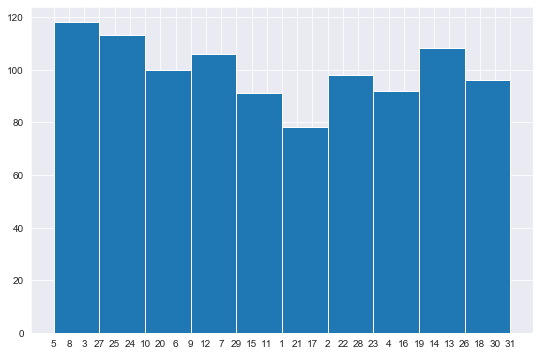

In [10]:
plt.figure(figsize=(9,6))
sns.set_style("darkgrid")
df['Day'].hist()

Agora vamos trabalhar a coluna **"Payment"(forma de pagamento)**, novamento utilizando o método "groupby". <br><br>
Vamos calcular a média entre as formas de pagamento. 

In [11]:
df.groupby("Payment").mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Payment,,,,,,,,
Cash,56.758983,5.511628,15.532471,326.181890,310.649419,4.761905,15.532471,6.970058
Credit card,54.394469,5.536977,15.429042,324.009878,308.580836,4.761905,15.429042,7.003215
Ewallet,55.740174,5.484058,15.181933,318.820600,303.638667,4.761905,15.181933,6.947826


Agora vamos ver, graficamente, como está essa divisão entre as linhas de produtos.  

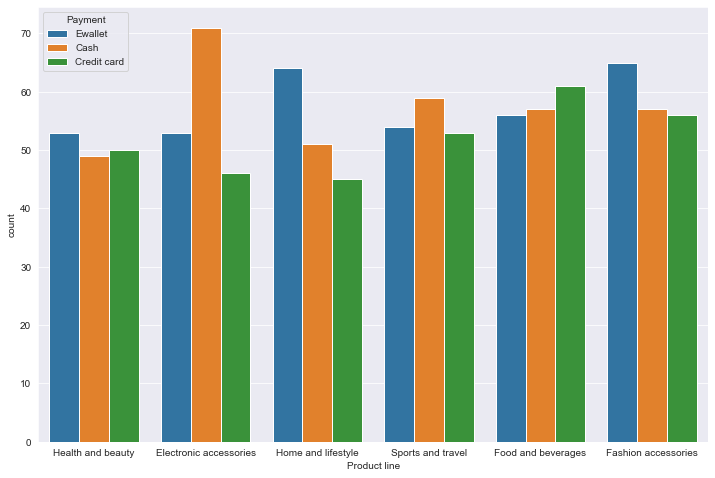

In [13]:
plt.figure(figsize=(12,8))
sns.countplot("Product line", hue='Payment', data=df)

Nota-se que para a compra de "Electronic accessories", os clientes tendem a utilizar mais dinheiro; <br>
Nota-se tambem que a **"Ewallet"(carteira eletronica)**, está presente na maioria das linhas de produtos. 

# Conclusão 
O presente trabalho teve como objetivo apresentar uma análise exploratória a respeito dos dados mais relevante. <br>
Mesmo não aplicando um algorítmo de predição, os dados aqui trabalhados auxiliam na tomada de decisão e a prever possíveis comportamentos a respeito dos supermercados e seus clientes.<br><br>
Estarei disponibilizando tambem um rascunho do projeto, contendo algumas informações adicionais, que julguei não sendo necessárias apresentar no projeto final. 